In [27]:
import os
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
#from u_interpolate_small import regrid_irregular_quick
from datetime import date
import u_interpolate_small as uint
from ndays import numOfDays
import glob
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cf
import pickle as pkl

In [28]:
# Define domain and time period
#south africa domain
#start_lat,end_lat,start_lon,end_lon = -28,-7.5,17.5, 30
# west africa domain
#start_lat,end_lat,start_lon,end_lon = -10,10,8,20
#end_lat = -7.5
domain ='WA'


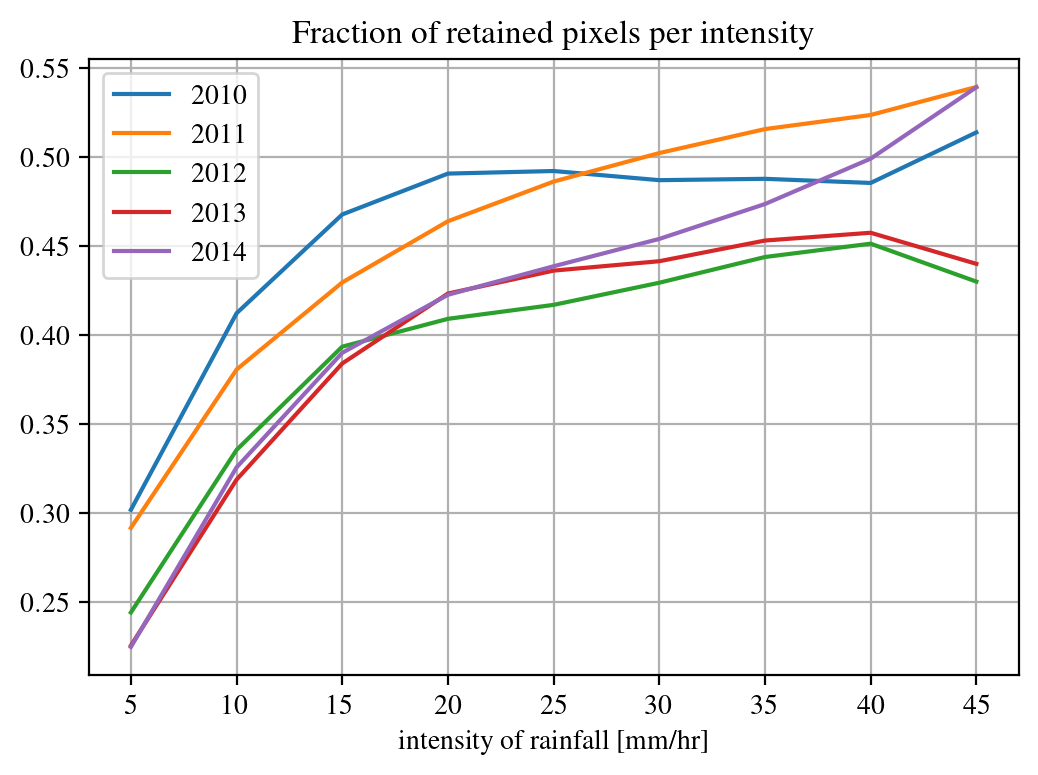

In [30]:
f = plt.figure(figsize=(6,4), dpi=200)
ax = f.add_subplot(111)
plotdic = []
strt = {}
#line_styles = ['--','-.','-.','-.',':']
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

for dat in range(int(start_year),int(end_year),1):   #['3km LS, 3k weighting', '3km LS, nflics weighting',  '3km small, 3kweighting', '3km LS, 3k regridded, 3k weighting', '5k, nflics', '5k LS definition, nflics weighting','3k native rain', '3k regrid rain', '5k rain']:
    strt[dat-2010]=pkl.load(open('stats/'+str(dat)+'_retained_pixels_'+domain+'.pkl', "rb"))
    plotdic.append((strt[dat-2010],str(dat)))
    
i=0
for pp in plotdic:    
    ax.plot(range(5,50,5), pp[0], label=pp[1])#,linestyle=line_styles[i])
    i = i+1

ax.set_title("Fraction of retained pixels per intensity")
plt.xlabel('intensity of rainfall [mm/hr]')
plt.grid()
plt.legend()
 
f.savefig('figures/retained_pixels_'+domain+'.jpg')  


In [31]:
#data=pkl.load(open('stats/'+str(2010)+'_intensity.pkl', "rb"))

#print(len(data))
#print(data[1])

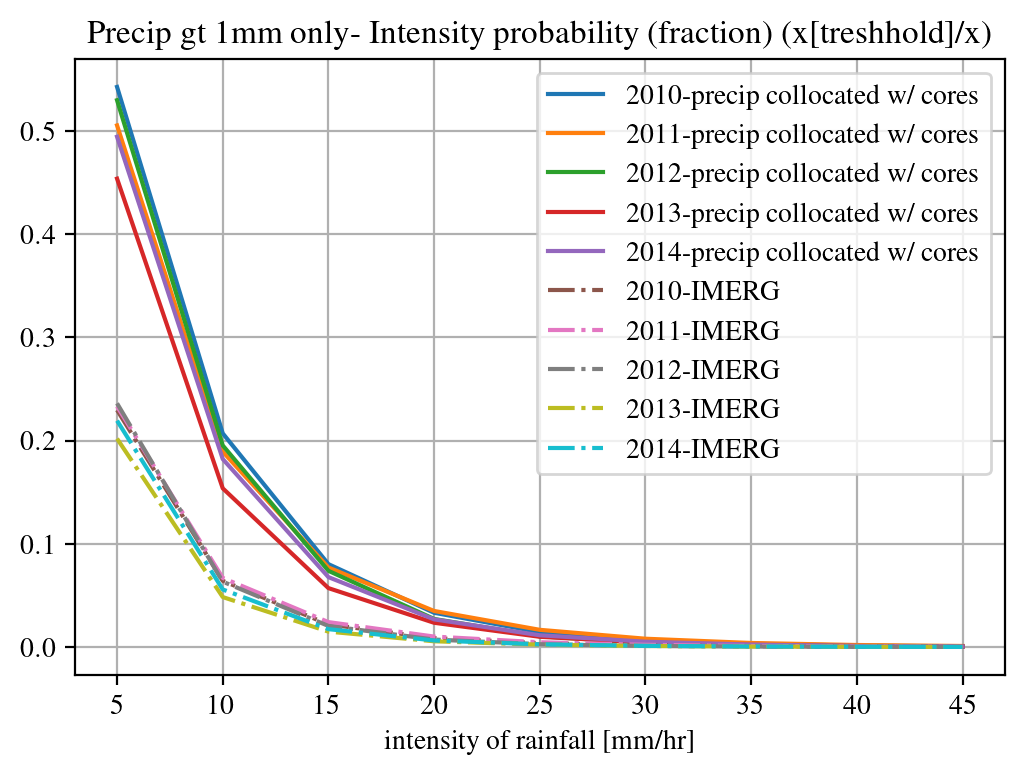

In [32]:
f = plt.figure(figsize=(6,4), dpi=200)
ax = f.add_subplot(111)
plotdic = []
plotdic1 = []
strt = {}
line_styles = ['-','-.','-.','-.',':']
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

for dat in range(int(start_year),int(end_year),1): 
    strt[dat-2010]=pkl.load(open('stats/'+str(dat)+'_intensity_'+domain+'.pkl', "rb"))[0]
    plotdic.append((strt[dat-2010],str(dat)+'-precip collocated w/ cores'))
    strt[dat-2010]=pkl.load(open('stats/'+str(dat)+'_intensity_'+domain+'.pkl', "rb"))[1]
    plotdic1.append((strt[dat-2010],str(dat)+'-IMERG'))

i=0    
for pp in plotdic:    
    ax.plot(range(5,50,5), pp[0], label=pp[1],linestyle=line_styles[0])
    i=i+1
i=0    
for pp in plotdic1:    
    ax.plot(range(5,50,5), pp[0], label=pp[1],linestyle=line_styles[1])
    i=i+1

plt.grid()
ax.set_title("Precip gt 1mm only- Intensity probability (fraction) (x[treshhold]/x)")
plt.xlabel('intensity of rainfall [mm/hr]')
plt.legend()
f.savefig('figures/intensity_'+domain+'.jpg')  
